# Intro to Pydot and Graphviz libraries
To be used for debugging TDI Jupyter notebooks that crash on pydot and graphvis in my conda virtual environement.  These notes are aimed at tailoring the virtual env to make pydot and graphviz work.  This first attempt is in an environment cloned from scipy2.


The requirements file from TDI Digital Oceans vagrant instance is `~/Data/TDI/home/pip_list_output.txt`   
  
Listed includes:  
* pydot 1.0.2  
* pyparsing 1.5.7  

`$conda install pydot`   
```
asks to install:  
    pydot 1.0.28   
and downgrades:   
    pyparsing 2.0.3 -> 1.5.6
```

In [1]:
import pydot


Couldn't import dot_parser, loading of dot files will not be possible.


In [11]:
graph = pydot.Dot(graph_type='digraph', nodesep=.75)
graph.set_node_defaults(style="filled", fillcolor="grey")
graph.set_edge_defaults(color="blue", arrowhead="vee", weight="0")

graph.create_fig()


'#FIG 3.2\n# Generated by graphviz version 2.38.0 (20140413.2041)\n# Title: G\n# Pages: 1\nPortrait\nCenter\nInches\nLetter\n100.00\nSingle\n-2\n1200 2\n0 32 #d3d3d3\n0 33 #fffffe\n2 3 0 1 33 7 2 0 20 0.0 0 0 0 0 0 5\n 0 160 0 0 160 0 160 160 0 160\n# end of FIG file\n'

Error: `GraphViz's executables not found`   

Stack exchange suggests installing graphviz via homebrew on the mac, rather than trying conda or anything else.
https://stackoverflow.com/questions/26153413/error-graphvizs-executables-not-found-when-calling-graphviz-layout-from-netwo   

`$ brew install graphviz`   
```sh
WalterAir:~ walter$ brew install graphviz
==> Downloading http://graphviz.org/pub/graphviz/stable/SOURCES/graphviz-2.38.0.
######################################################################## 100.0%
==> Downloading https://trac.macports.org/export/103168/trunk/dports/graphics/gr
######################################################################## 100.0%
==> Patching
patching file macosx/graphviz.xcodeproj/project.pbxproj
==> ./configure --prefix=/usr/local/Cellar/graphviz/2.38.0 --without-qt --with-q
==> make install
🍺  /usr/local/Cellar/graphviz/2.38.0: 469 files, 68M, built in 3.0 minutes
```

This solves the error.

In [59]:
graph = pydot.Dot(graph_type='digraph', nodesep=.75)
graph.set_node_defaults(style="filled", fillcolor="grey")
graph.set_edge_defaults(color="blue", arrowhead="vee", weight="0")

graph.create_fig()
graph.create_dot()
graph.create_png()

graph.shape_files
print graph.__doc__   # same output as >>>graph?


A container for handling a dot language file.

    This class implements methods to write and process
    a dot language file. It is a derived class of
    the base class 'Graph'.
    


In [23]:
print graph.create.__doc__



Creates and returns a Postscript representation of the graph.

        create will write the graph to a temporary dot file and process
        it with the program given by 'prog' (which defaults to 'twopi'),
        reading the Postscript output and returning it as a string is the
        operation is successful.
        On failure None is returned.
        
        There's also the preferred possibility of using:
        
            create_'format'(prog='program')
            
        which are automatically defined for all the supported formats.
        [create_ps(), create_gif(), create_dia(), ...]
        
        If 'prog' is a list instead of a string the fist item is expected
        to be the program name, followed by any optional command-line
        arguments for it:
        
            [ 'twopi', '-Tdot', '-s10' ]
        


In [60]:
from IPython import display
from sklearn import datasets, utils, tree
from sklearn.externals.six import StringIO  

dataset = datasets.load_iris()

The sklearn dataset is of type(): <class 'sklearn.datasets.base.Bunch'>
"graph" is object of type <class 'pydot.Dot'>


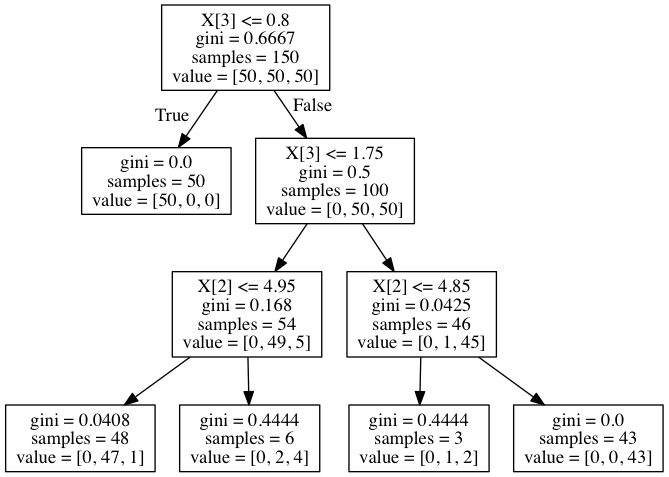

In [67]:
print 'The sklearn dataset is of type(): {}'.format(type(dataset))
dataset
X_iris, y_iris = utils.shuffle(dataset.data, dataset.target, random_state=42)
tree_clf = tree.DecisionTreeClassifier(max_depth=3).fit(X_iris, y_iris)

dot_data = StringIO()
tree.export_graphviz(tree_clf, out_file=dot_data)
dot_data.getvalue()

graph = pydot.graph_from_dot_data(dot_data.getvalue())
print '"graph" is object of type {}'.format(type(graph))

display.Image(graph.create_png())

In [43]:
print tree.export_graphviz.__doc__

Export a decision tree in DOT format.

    This function generates a GraphViz representation of the decision tree,
    which is then written into `out_file`. Once exported, graphical renderings
    can be generated using, for example::

        $ dot -Tps tree.dot -o tree.ps      (PostScript format)
        $ dot -Tpng tree.dot -o tree.png    (PNG format)

    The sample counts that are shown are weighted with any sample_weights that
    might be present.

    Read more in the :ref:`User Guide <tree>`.

    Parameters
    ----------
    decision_tree : decision tree classifier
        The decision tree to be exported to GraphViz.

    out_file : file object or string, optional (default="tree.dot")
        Handle or name of the output file.

    max_depth : int, optional (default=None)
        The maximum depth of the representation. If None, the tree is fully
        generated.

    feature_names : list of strings, optional (default=None)
        Names of each of the features.

    cla

In [46]:
print StringIO.__doc__

class StringIO([buffer])

    When a StringIO object is created, it can be initialized to an existing
    string by passing the string to the constructor. If no string is given,
    the StringIO will start empty.

    The StringIO object can accept either Unicode or 8-bit strings, but
    mixing the two may take some care. If both are used, 8-bit strings that
    cannot be interpreted as 7-bit ASCII (that use the 8th bit) will cause
    a UnicodeError to be raised when getvalue() is called.
    


# Display YouTube video in Jupyter notebook

In [77]:

# https://www.youtube.com/watch?v=2TT1EKPV_hc
youtube_id = "2TT1EKPV_hc"

vid = display.YouTubeVideo(youtube_id)
display.display(vid)


In [78]:
print display.YouTubeVideo.__doc__

Class for embedding a YouTube Video in an IPython session, based on its video id.

    e.g. to embed the video from https://www.youtube.com/watch?v=foo , you would
    do::

        vid = YouTubeVideo("foo")
        display(vid)

    To start from 30 seconds::

        vid = YouTubeVideo("abc", start=30)
        display(vid)

    To calculate seconds from time as hours, minutes, seconds use
    :class:`datetime.timedelta`::

        start=int(timedelta(hours=1, minutes=46, seconds=40).total_seconds())

    Other parameters can be provided as documented at
    https://developers.google.com/youtube/player_parameters#parameter-subheader
    


# Reproducibility   
http://codingnews.info/slides/environments.html#/18  

## Anaconda.org login  
```
anaconda login --help
anaconda lo

## Working with notebooks
```
$ conda create -n project
$ conda install -y bokeh pandas jupyter
$ ipython notebook iris.ipynb
$ conda env attach -n iris iris.ipynb
$ anaconda notebook upload iris.ipynb
```

## Reusing your notebook  (anaconda.org username: walter)  
```
$ anaconda notebook download walter/iris
$ conda env create iris.ipynb
$ source activate iris
$ ipython notebook iris.ipynb
```